In [4]:
!pip install matplot

In [17]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from spacy.matcher import PhraseMatcher


# Carrega o modelo de língua inglesa, pois o texto do arquivo está em inglês.
modelo_spacy = spacy.load("en_core_web_lg")


In [ ]:
# Listas para termos em inglês presentes no texto
lista_cargos_en = ["Project Manager", "Analyst"]
lista_termos_tec_en = ["AI", "PC", "GPU", "SDK", "API", "LLM"]
lista_organizacoes_en = ["HP", "Intel", "AMD", "Qualcomm", "Samsung"]


# Abre, lê e armazena o conteúdo do arquivo txt.
with open('PDW_Meeting_Follow_UP_03122024.txt','r', encoding='utf-8') as arquivo:
    texto_entrada = arquivo.read()

# Configuração do PhraseMatcher para Entidades Customizadas 
matcher = PhraseMatcher(modelo_spacy.vocab, attr='LOWER') # attr='LOWER' ignora maiúsculas/minúsculas
matcher.add("CARGO", [modelo_spacy.make_doc(text) for text in lista_cargos_en])
matcher.add("TERMO_TEC", [modelo_spacy.make_doc(text) for text in lista_termos_tec_en])
matcher.add("ORG", [modelo_spacy.make_doc(text) for text in lista_organizacoes_en]) # Adicionando ORG customizada

In [ ]:
#  Processamento do Texto e Extração de Entidades
lista_entidades_coletadas = []
doc = modelo_spacy(texto_entrada)

# Coleta de entidades padrão do SpaCy
for ent in doc.ents:
    lista_entidades_coletadas.append({
        "entidade": ent.text,
        "tipoDaEntidade": ent.label_,
        "origem": "SpaCy_Padrao"
    })

# Coleta de entidades customizadas via regras do PhraseMatcher
matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    label = modelo_spacy.vocab.strings[match_id]
    lista_entidades_coletadas.append({
        "entidade": span.text,
        "tipoDaEntidade": label,
        "origem": "Regra_Customizada"
    })


Entidades padrão do SpaCy coletadas.


In [23]:
# Criação e Visualização do DataFrame ---
df_entidades = pd.DataFrame(lista_entidades_coletadas)

# Remove entidades duplicadas que podem ser pegas tanto pelo SpaCy quanto pelas regras
df_organizado = df_entidades.drop_duplicates(subset=['entidade', 'tipoDaEntidade']).reset_index(drop=True)

pd.set_option('display.max_rows', 20) # Limita a exibição para não poluir a tela
print("\n--- Amostra do DataFrame de Entidades Identificadas ---")
print(df_organizado)
print("-" * 50)



--- Amostra do DataFrame de Entidades Identificadas ---
             entidade tipoDaEntidade             origem
0    Arthi Panduranga         PERSON       SpaCy_Padrao
1          Mary Doobe         PERSON       SpaCy_Padrao
2                 SDK            ORG       SpaCy_Padrao
3     Tácito Henrique         PERSON       SpaCy_Padrao
4                Zoom            ORG       SpaCy_Padrao
..                ...            ...                ...
143                PC      TERMO_TEC  Regra_Customizada
144               AMD            ORG  Regra_Customizada
145               GPU      TERMO_TEC  Regra_Customizada
146               LLM      TERMO_TEC  Regra_Customizada
147               API      TERMO_TEC  Regra_Customizada

[148 rows x 3 columns]
--------------------------------------------------


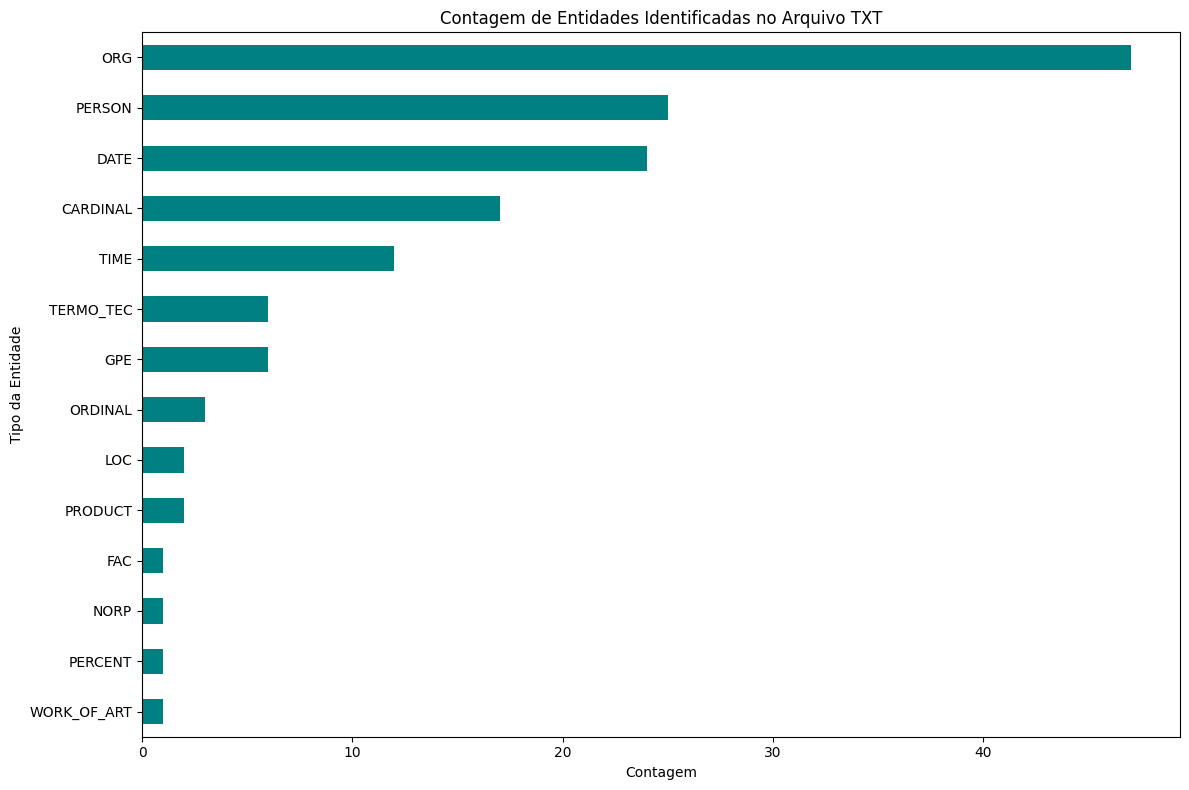

In [24]:
# Geração do Gráfico de Contagem de Entidades 
contagem_entidades = df_organizado['tipoDaEntidade'].value_counts()

plt.figure(figsize=(12, 8))
contagem_entidades.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title('Contagem de Entidades Identificadas no Arquivo TXT')
plt.xlabel('Contagem')
plt.ylabel('Tipo da Entidade')
plt.tight_layout() # Ajusta o layout para garantir que tudo fique visível
plt.show()